In [24]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.spatial.distance import cdist

symbolic = '[<>?,%()]|nan|NAN|NaN|na|NA'

In [25]:
def pca(data, n_components, threshold=0.95 ):
    # Step 1: Standardize the data (zero mean and unit variance)
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    standardized_data = (data - mean) / std

    # Step 2: Compute the covariance matrix
    covariance_matrix = np.cov(standardized_data, rowvar=False)

    # Step 3: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Step 4: Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    total_variance = np.sum(eigenvalues)
    explained_variance_ratio = eigenvalues / total_variance
    cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

    # Step 5: Select the top n_components eigenvectors
    top_n = 0
    for index, sum_variance in enumerate(cumulative_explained_variance_ratio):
        # print(index, sum_variance)
        top_n = index + 1
        if sum_variance >= 0.95:
            break
    print(f"top_n components is {top_n}")
    top_components = eigenvectors[:, :top_n]

    # Step 6: Project the data onto the principal components
    projected_data = np.dot(standardized_data, top_components)

    return projected_data, eigenvalues[:n_components], top_components, explained_variance_ratio, cumulative_explained_variance_ratio


In [26]:
def preprocessing(data):
    columns = data.columns
    for column in columns:
        new_values = []
        for cell in data[column]:
            new_value = str(cell)
            new_value = re.sub(symbolic, '', new_value)       # del symbolic
            new_value = new_value.strip()                     # del space
            if new_value == '':
                new_value = None
            elif new_value.find(' kha') >= 0:
                new_value = new_value.replace(' kha', '')
                new_value = float(new_value) * 1000.0
            elif new_value.find(' Mha') >= 0:
                new_value = new_value.replace(' Mha', '')
                new_value = float(new_value) * 1000000.0
            elif new_value.find(' ha') >= 0:
                new_value = new_value.replace(' ha', '')
                new_value = float(new_value)
            else:
                # print(column, new_value)
                new_value = float(new_value)
            # print(new_value)
            new_values.append(new_value)
        data[column] = new_values
    for column in data.columns:
        mean_value = data[column].astype(float).mean()  # คำนวณค่าเฉลี่ย
        data[column] = data[column].fillna(mean_value)  # แทน NaN ด้วย mean
        # data[column] = data[column].replace(to_replace='NAN', value='0')   # NAN(string)
        # data[column] = data[column].astype(str).astype(float)

    # data = np.nan_to_num(data, nan=0, posinf=0, neginf=0)                  # NAN(Numpy)
    return data

In [27]:
file_path = 'C:\\Users\\HP\\Desktop\\MLIS PROJECT\\Butterfly_Data_extended (1).xlsx'

numerical_columns = [
        #'Number of species',
        'area',
        'latitude',
        'Amount of forest lost 2023',
        '% Of landmass used for agriculture',
        'Metres from Sea Level',
        'plant species',
        'the average Annual Relative Humidity',
        'Agricultural land percentage (0-100%)',
        'forest area %'
    ]

In [28]:
data = pd.read_excel(file_path)
countries = data['Country']
num_species = data['Number of species']
new_data = data[numerical_columns]
data_array = preprocessing(new_data)


# Perform PCA
max_num_features = min(data.shape) - 1    
projected_data, explained_variance, components, expected_variance, cumu_variances = pca(data_array, n_components=max_num_features)

# Print results
print("Projected Data:")
print(projected_data)
print("\nExplained Variance:")
print(f"\nNumber of Selected Principal Components: {components.shape[1]}")
print()

top_n components is 7
Projected Data:
[[ 1.16432203e+00 -6.09361781e-01 -4.21009507e-01  4.11181765e-02
   4.05048869e-03  8.31947563e-01 -2.78078213e-01]
 [-4.24929873e-01 -1.14309950e+00  2.91592785e-01  2.72988654e-01
  -3.34543002e-01 -1.41007972e-01 -4.69098936e-01]
 [ 1.09878888e-02 -7.40496844e-01 -1.24706884e-01  1.84641186e-01
   2.15553927e-04  2.52016484e-01  8.69414102e-02]
 [ 1.48660634e+00 -8.17943169e-01 -3.13106137e-01 -3.20004443e-01
  -1.95542956e+00 -9.96407710e-01 -6.69283755e-01]
 [-4.35095465e-01 -9.32647539e-01  1.55036880e-01  3.47426298e-01
   2.60697259e-01  4.14559540e-01 -1.18657214e-01]
 [-1.89399257e+00 -1.35868964e+00  6.65510559e-01  5.56794536e-01
   2.52235969e-01 -2.18639590e-01 -4.49708814e-01]
 [ 1.81173117e+00 -1.26136852e+00  5.91917898e-01  3.36954062e-01
  -7.13481433e-01  9.84862514e-01 -2.13498710e-02]
 [ 5.50939484e+00 -1.49895926e+00  3.07250803e+00 -2.41470882e+00
   3.06079046e+00 -1.75598516e+00 -1.82165674e-03]
 [-4.80931638e-01 -4.22340

C:\Users\HP\AppData\Local\Temp\ipykernel_27244\4210853494.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = new_values
C:\Users\HP\AppData\Local\Temp\ipykernel_27244\4210853494.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].fillna(mean_value)  # แทน NaN ด้วย mean


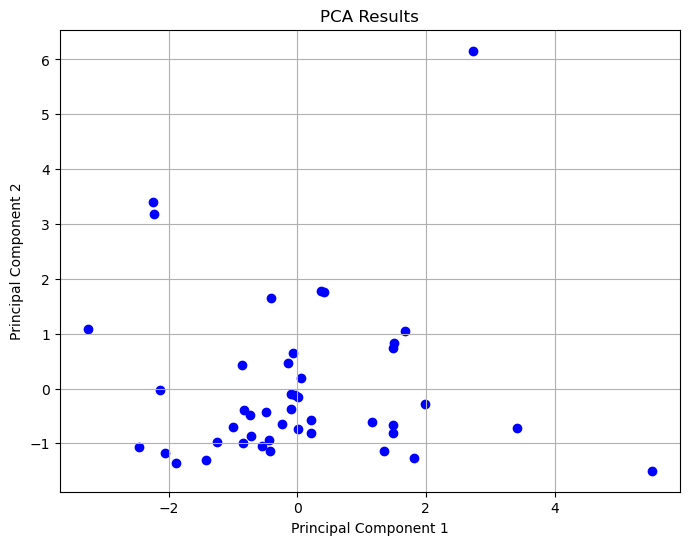

In [29]:
# Visualize the first 2 projected data
plt.figure(figsize=(8, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1], color="blue")
plt.title("PCA Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()

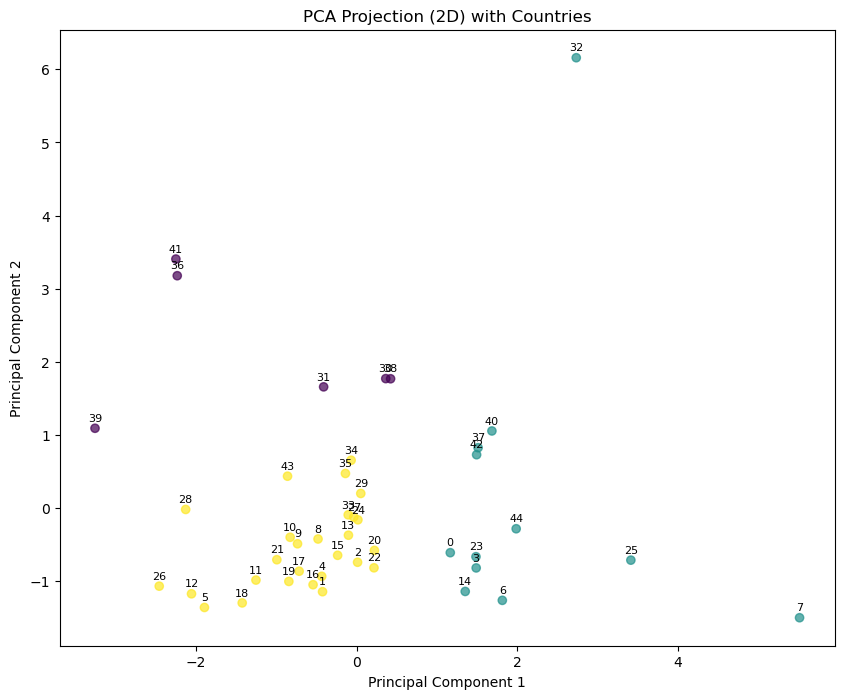

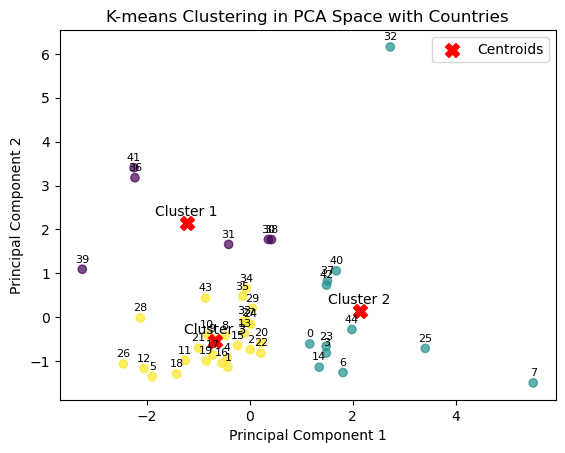

Cluster 1:
Kinabalu - Number of species: 625
Mexico State - Number of species: 325
Australia - Number of species: 398
Tanzania - Number of species: 1583
South Africa - Number of species: 797
India - Number of species: 1163

Cluster 2:
Austria - Number of species: 197
Cyprus - Number of species: 48
Estonia - Number of species: 98
Finland - Number of species: 110
Latvia - Number of species: 105
Slovenia - Number of species: 172
Sweden - Number of species: 108
Federal District, Brazil - Number of species: 839
Zambia - Number of species: 901
Cameroon - Number of species: 1593
Nepal - Number of species: 643
Hong Kong - Number of species: 236

Cluster 3:
Belgium - Number of species: 88
Bulgaria - Number of species: 211
Czech Republic - Number of species: 140
Denmark - Number of species: 63
France - Number of species: 244
Germany - Number of species: 178
Greece - Number of species: 230
Hungary - Number of species: 152
Ireland - Number of species: 30
Italy - Number of species: 264
Lithuania - 

In [30]:
reduced_data = projected_data
numbers = range(len(reduced_data))
num_clusters = 3
np.random.seed(42)
initial_centroids = reduced_data[np.random.choice(reduced_data.shape[0], num_clusters, replace=False)]
centroids = initial_centroids.copy()

for iteration in range(100):
    # Assign clusters
    distances = cdist(reduced_data, centroids, metric='euclidean')
    cluster_assignments = np.argmin(distances, axis=1)
    
    # Update centroids
    new_centroids = np.array([reduced_data[cluster_assignments == k].mean(axis=0) for k in range(num_clusters)])
    
    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids

plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_assignments, alpha=0.7)

# Create a legend for the clusters
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection (2D) with Countries')

# Annotate points with country names
for i, number in enumerate(numbers):
    plt.annotate(number, (reduced_data[i, 0], reduced_data[i, 1]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

# Show the plot
plt.show()

# If you want to add country info in the K-means plot
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_assignments, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=100, label='Centroids')

# Annotate centroids with cluster numbers
for i, centroid in enumerate(centroids):
    plt.annotate(f'Cluster {i+1}', (centroid[0], centroid[1]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)

# Annotate points with country names
for i, number in enumerate(numbers):
    plt.annotate(number, (reduced_data[i, 0], reduced_data[i, 1]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering in PCA Space with Countries')
plt.legend()
plt.show()

# After performing K-means clustering, group country names and their species count by their assigned clusters
country_species_groups = {i: [] for i in range(num_clusters)}

# Assign country names and their number of species to their respective clusters
for i, cluster_id in enumerate(cluster_assignments):
    country_species_groups[cluster_id].append((countries.iloc[i], num_species.iloc[i]))

# Print the list of countries and their associated number of species in each cluster
for cluster_id, country_species_list in country_species_groups.items():
    print(f"Cluster {cluster_id + 1}:")
    for country, species_count in country_species_list:
        print(f"{country} - Number of species: {species_count}")
    print()  # Blank line between clusters
